<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Lab: Regressão Linear**

## imports

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Ex1. Vanilla `statsmodels` I (2.5)

Faça um modelo de regressão linear para estimar os valores de `body_mass_g` com base nos demais atributos **numéricos** (considere todas as variáveis independente do $p-value$ indicar o atributo significativo ou não). Com o modelo obtido faça a predição do peso (`body_mass_g`) de pinguins com as seguintes medidas:

```
bill_length_mm	bill_depth_mm	flipper_length_mm
      38	           17	             190
      40	           21	             198
```

**nota**: Lembre-se de verificar a presença de valores nulos, excluindo quaisquer linhas com quaisquer valores ausentes.

In [54]:
df.shape

(344, 7)

In [55]:
df2 = df.dropna()
df2.shape

(333, 7)

In [56]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [57]:
result = sm.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm', df2).fit()

In [58]:
case1 = pd.DataFrame({'bill_length_mm': [38,40], 'bill_depth_mm': [17,21], 'flipper_length_mm': [190,198]})
result.predict(case1)

,0
0,3627.676399
1,4111.704741


In [59]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          9.26e-103
Time:                        20:47:20   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.13

# Ex2. Vanilla `statsmodels` II (2.5)

Faça um modelo de regressão linear para estimar os valores de `body_mass_g` com base em **todos os atributos preditores significativos**. Com o modelo  obtido faça a predição do peso (`body_mass_g`) de um pinguim do sexo feminino, da especie Adelie e da ilha de Torgersen cujas as demais medidas são a média da medidas de sua espécie e sexo.



In [60]:
lm = sm.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + sex + species + island', data=df2).fit()

In [61]:
pd.DataFrame(lm.summary().tables[1].data[1::], columns=lm.summary().tables[1].data[0]).set_index('')

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-1500.0291,575.822,-2.605,0.010,-2632.852,-367.207
sex[T.Male],387.2243,48.138,8.044,0.000,292.521,481.927
species[T.Chinstrap],-260.3063,88.551,-2.940,0.004,-434.513,-86.100
species[T.Gentoo],987.7614,137.238,7.197,0.000,717.771,1257.752
island[T.Dream],-13.1031,58.541,-0.224,0.823,-128.271,102.065
island[T.Torgersen],-48.0636,60.922,-0.789,0.431,-167.915,71.788
bill_length_mm,18.1893,7.136,2.549,0.011,4.150,32.229
bill_depth_mm,67.5754,19.821,3.409,0.001,28.581,106.570
flipper_length_mm,16.2385,2.939,5.524,0.000,10.456,22.021


In [62]:
adelie = df2[(df2.species=='Adelie') & (df2.sex=='Female')]

In [63]:
adelie = adelie.describe()

In [64]:
adelie.bill_length_mm.mean()

37.28580215058966

In [65]:
lm2 = sm.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + sex + species', data=df2).fit()

In [66]:
case2 = pd.DataFrame({'bill_length_mm': [adelie.bill_length_mm['mean']], 'bill_depth_mm': [adelie.bill_depth_mm['mean']], 'flipper_length_mm': [adelie.flipper_length_mm['mean']], 'sex': ['Female'], 'species': ['Adelie']})
lm2.predict(case2)


,0
0,3397.130037


In [67]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     380.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.82e-144
Time:                        20:47:21   Log-Likelihood:                -2354.0
No. Observations:                 333   AIC:                             4722.
Df Residuals:                     326   BIC:                             4749.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1460.9946    571.308     -2.557      0.011   -2584.911    -337.079
sex[T.Male]            389.8915     47.848      8.148      0.000     295.761     484.022
species[T.Chinstrap]  -251.4767     81.079     -3.102      0.002    -410.980     -91.973
species[T.Gentoo]     1014.6267    129.561      7.831      0.000     759.746    1269.507
bill_length_mm          18.2044      7.106      2.562      0.011       4.225      32.184
bill_depth_mm           67.2176     19.742      3.405      0.001      28.380     106.055
flipper_length_mm       15.9502      2.910      5.482      0.000      10.226      21.674
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.871
Skew:                           0.124   Prob(JB):                        0.647
Kurtosis:                       2.959   Cond. No.                     7.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ex3. `scikit-learn` (2.5)

Faça um modelo de regressão linear, agora empregando o `scikit-learn`, **idêntico ao modelo final obtido no exercício anterior, EXCETO que você deve excluir nesse modelo o intercept.** Obtenha o R2 e o valor previsto para o mesmo caso do exercício anterior.

Nota: lembre-se que os resultados, por conta do intercept, divergem e você deverá mesmo fazer o uso do `scikit-learn`.


In [68]:
X = df2[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex', 'species']]
X = pd.get_dummies(X, columns=['sex', 'species'], drop_first=True)
y = df2['body_mass_g']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

case2 = pd.DataFrame({'bill_length_mm': [adelie.bill_length_mm['mean']],
                      'bill_depth_mm': [adelie.bill_depth_mm['mean']],
                      'flipper_length_mm': [adelie.flipper_length_mm['mean']],
                      'sex_Male': [0],
                      'species_Chinstrap': [0],
                      'species_Gentoo': [0]})

prediction = model.predict(case2)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'prediction: {prediction}')
print(f'R2: {r2}')


prediction: [3393.292449]
R2: 0.8724536514447967


In [69]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                   Coefficient
bill_length_mm       15.106906
bill_depth_mm        48.999902
flipper_length_mm    10.474076
sex_Male            464.042030
species_Chinstrap  -190.338367
species_Gentoo     1125.787504


# Ex4. Erro e Resíduos (2.5)

Empregue o **mesmo modelo final do exercício Ex2.**

a. Calcule o MAPE e o RMSE do modelo sobre o conjunto total de dados

b. Os resíduos são o erro de previsão do modelo sem quaisquer transformações:

$$ Res_i = y_i - \hat{y_i} $$

Verifique graficamente se os resíduos têm distribuição normal.

In [70]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Mean Absolute Percentage Error (MAPE)
    if np.any(y_true == 0):
        metrics['MAPE'] = 'Undefined (division by zero)'
    else:
        metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    metrics['sMAPE'] = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Mean Absolute Deviation (MAD)
    metrics['MAD'] = np.mean(np.abs(y_true - np.mean(y_true)))

    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    return metrics

# calculate_metrics(y_true, y_pred)


In [71]:
calculate_metrics(df2.body_mass_g, lm2.predict(df2.drop(columns=['body_mass_g','island'])))

MSE: 80827.77
RMSE: 284.30
MAPE: 5.61
MAE: 226.93
sMAPE: 5.58
MAD: 679.89


{'MSE': 80827.76789324523,
 'RMSE': 284.3022474291141,
 'MAPE': 5.6102616717950005,
 'MAE': 226.92621480984664,
 'sMAPE': 5.576570456733541,
 'MAD': 679.8902506109714}

<ipython-input-76-9be992a5cc21>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


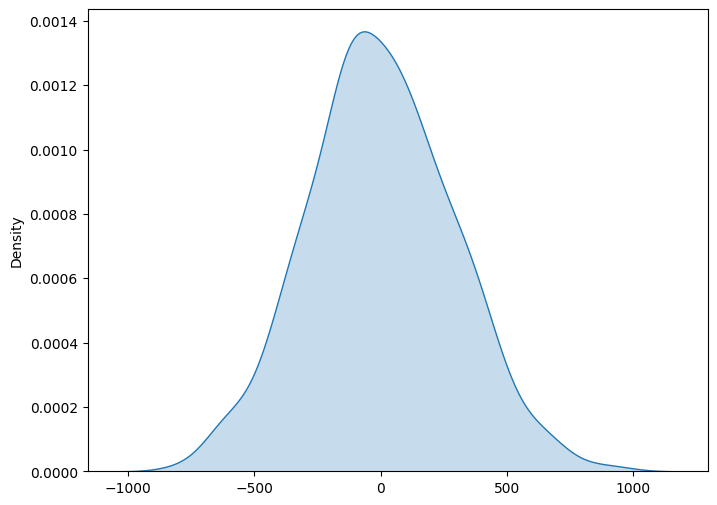

In [76]:
residuals = df2['body_mass_g'] - lm2.predict(df2.drop(columns=['body_mass_g','island']))
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, shade=True)
plt.show()


# Ex5. Diferentes modelos (1.0)

Compare o modelo linear do Ex3. (**considere agora o modelo linear com o intercept**) com os modelos robustos e outros dois modelos de regressão não linear do `scikit-learn`, o `SVR` e o `Ridge`. Quais desses modelos apresenta valores de R2 e um erro (RMSE) melhores que da regressão linear?